In [1]:
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd 
import wandb

In [2]:
# WANDB API
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("7shoe/AdaParse-text-cls")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

# assemble initial DF
runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

# merge
summary_df = pd.json_normalize(runs_df['summary'])
config_df = pd.json_normalize(runs_df['config'])
runs_df = runs_df.drop(columns=['summary', 'config'])
df = pd.concat([runs_df, summary_df, config_df], axis=1)

# 
#runs_df.to_csv("project.csv")

In [8]:
[f for f in list(df.columns) if 'max' in f] #['eval_accuracy']

['max_steps',
 'max_length',
 'max_grad_norm',
 'max_number_chars',
 'max_position_embeddings',
 'max_relative_positions']

In [9]:
df[['max_number_chars', 'eval_accuracy']]

,max_number_chars,eval_accuracy
0,1600,0.937618
1,1600,0.948960
2,1600,0.960302
3,1600,0.366730
4,1600,0.137996
5,1600,0.291115
6,3200,0.941399
7,3200,0.947070
8,3200,0.941399
9,3200,0.234405


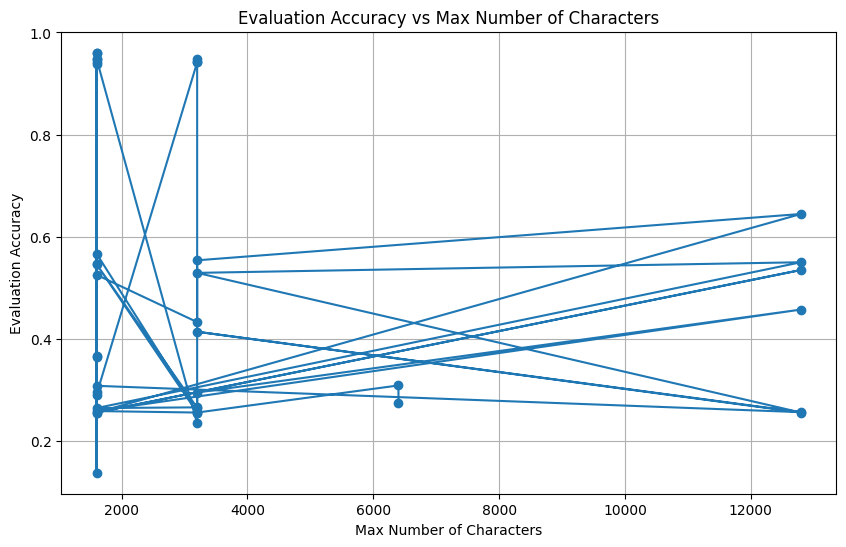

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['max_number_chars'], df['eval_accuracy'], marker='o', linestyle='-')
plt.xlabel('Max Number of Characters')
plt.ylabel('Evaluation Accuracy')
plt.title('Evaluation Accuracy vs Max Number of Characters')
plt.grid(True)
plt.show()